In [1]:
import sys
import os
import pandas as pd
import numpy as np

In [2]:

#############################################################################
### Import and inspect the desired datasets
#############################################################################

filt = pd.read_csv("data/filtered_data.csv")
# filt = pd.read_csv("imputed_filt.csv")
# print(filt.head())
# print(len(filt))

out = pd.read_csv("data/targets.csv")
# out = pd.read_csv("imputed_targets.csv")
# print(out.head())
# print(len(out))

# Get the number of columns in the input dataframe
ncol = len(filt.columns)


In [3]:
#############################################################################
### Use the vocab_dictionary function to create the dictionary mapping
#############################################################################

from scripts.myfunctions import vocab_dictionary

#############################################################################
### Retrieve the vocabulary for the input and output data
#############################################################################

in_vocab = vocab_dictionary(filt)
out_vocab = vocab_dictionary(out)

vocab_size = len(in_vocab)
print(vocab_size)

339


In [4]:
#############################################################################
### Create data subsets for 2022 and other year subsets we may want
#############################################################################

# Get all data before most recent year (2022)
pre_2022 = filt[filt['year'] != 'a2022'].copy()
els_2022 = filt[filt['year'] == 'a2022'].copy()

out_pre_2022 = out[:len(pre_2022)]
out_2022 = out[len(pre_2022):]

elnos_2022 = out_2022.index.tolist()
elnos_pre2022 = pre_2022.index.tolist()

# Get data from 2020
data_2020 = filt[filt['year'] == 'a2020'].copy()
out_2020 = pd.merge(out, data_2020, left_index=True, right_index=True).copy()

elnos_2020 = data_2020.index.tolist()

# Also subset some random year, take 1988

data_1988 = filt[filt['year'] == 'a1988'].copy()
data_not1988 = filt[filt['year'] != 'a1988'].copy()

out_1988 = pd.merge(out, data_1988, left_index=True, right_index=True).copy()
out_not1988 = pd.merge(out, data_not1988, left_index=True, right_index=True).copy()

elnos_1988 = data_1988.index.tolist()

In [5]:
#############################################################################
### Import encoding functions to get tensors to be used for training
#############################################################################

from scripts.myfunctions import encode_instance, encode_batch, encode_specific

# Get a specific encoding of the elections from 2022, as an example
x, y = encode_specific(df_in=els_2022, df_out=out_2022, els=elnos_2022, in_vocab=in_vocab, out_vocab=out_vocab)
print(x, y)

tensor([[ 38,  41,  52,  ..., 261, 286, 326],
        [ 38,  41,  52,  ..., 258, 286, 326],
        [ 38,  41,  51,  ..., 260, 289, 331],
        ...,
        [ 38,  41,  52,  ..., 261, 276, 328],
        [ 38,  41,  51,  ..., 262, 279, 332],
        [ 38,  42,  53,  ..., 264, 287, 325]]) tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])


In [6]:
#############################################################################
### Set globals to be used by the model in the next step
#############################################################################
from scripts.config import globals
globals(vocab_size=vocab_size, out_space=3, ncol=ncol, n_embd=23, n_head=8, n_layer=3, dropout=0.2, device='cpu')

(339, 14, 23, 8, 3, 0.2, 3, 'cpu')

In [7]:
#############################################################################
### Import an instance of the model
#############################################################################
from scripts.model import ElectionModel
model = ElectionModel()

Training loss at iteration 0 = 1.095
Training loss at iteration 1 = 1.095
Training loss at iteration 2 = 1.094
Training loss at iteration 3 = 1.095
Training loss at iteration 4 = 1.095
Training loss at iteration 5 = 1.095
Training loss at iteration 6 = 1.094
Training loss at iteration 7 = 1.094
Training loss at iteration 8 = 1.094
Training loss at iteration 9 = 1.095
Final Loss = 1.0954928398132324


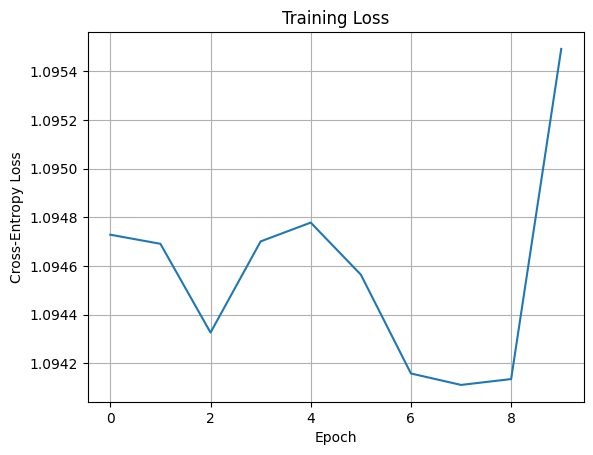

In [8]:
#############################################################################
### Train the model
#############################################################################

from scripts.myfunctions import train

train(model, epochs=10, data_in=data_not1988, data_out=out_not1988, in_vocab=in_vocab, out_vocab=out_vocab, 
      n_batch=100, lr = 1e-5, eval_iters = 1)

In [9]:
#############################################################################
### Evaluate the model on reserved data
## In this case, assume we've subsetted out 2022 house elections
#############################################################################

from scripts.myfunctions import predict

predict(model, data_in=data_1988, data_out=out_1988, els=elnos_1988, in_vocab=in_vocab, out_vocab=out_vocab)

Percentage of 2022 house elections predicted correctly = 40.23%
This is equivalent to 175 out of 435 correctly predicted.
